# Discrimination Against LGBT in Europe Dataset
#### June Enuj

In [24]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Abstract

For this lab, I will be combining everything I have learned from the first five labs, into this lab and showing what I know. The dataset I have chosen is one with data about LGBTQ peeople in Europe and whether or not they have been discriminated against. Some questions I'm going to keep in mind while I do this lab are: why is there data missing? what story does this dataset tell? why is the describe function look different? what kind of data makes up my dataset (nonnumerical or numerical,etc.)? How can this dataset be used in the real world to help people? 

## Dataset Exploration

First, I'm gonna open my dataset by using pandas. Next, by using the info and describe function, I will be able to look at my dataset and what exactly is in it. 

In [25]:
df = pd.read_csv("LGBT_Survey_Discrimination.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15775 entries, 0 to 15774
Data columns (total 7 columns):
CountryCode       15775 non-null object
subset            15775 non-null object
question_code     15775 non-null object
question_label    15775 non-null object
answer            15775 non-null object
percentage        15775 non-null object
notes             6980 non-null object
dtypes: object(7)
memory usage: 862.8+ KB


In [27]:
df.describe()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
count,15775,15775,15775,15775,15775,15775,6980
unique,29,5,32,32,26,102,2
top,Average,Transgender,c7,Why the most recent incident of discrimination...,Yes,:,[0]
freq,547,3440,1417,1417,2291,1198,5782


In [28]:
df.tail()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
15770,Average,Bisexual women,discrim1yr,"During the last 12 months, have you personally...",No,62,NaN
15771,Average,Bisexual men,discrim1yr,"During the last 12 months, have you personally...",Yes,28,NaN
15772,Average,Bisexual men,discrim1yr,"During the last 12 months, have you personally...",No,72,NaN
15773,Average,Transgender,discrim1yr,"During the last 12 months, have you personally...",Yes,46,NaN
15774,Average,Transgender,discrim1yr,"During the last 12 months, have you personally...",No,54,NaN


My dataset has 7 main columns, with 6 of them having no missing data, and 15,775 rows. The seventh column has missing data. The describe function looks different when applied to my dataset. Instead of the usual mean, average, max or min, or percentiles, there are only four rows: count, unique, top and frequency. Overall, my dataset looks pretty clean and with the exception of the missing data from the seventh column, all the data is there.

In [29]:
df.subset.unique()

array(['Lesbian', 'Gay', 'Bisexual women', 'Bisexual men', 'Transgender'],
      dtype=object)

I'm going to use the unique function in order to look at what labels are within the category 'subset'. After using it, I found out that there are only 5 different LGBTQ identifiers/labels, which kind of makes me think that based off of this survey, the LGBTQ spectrum in Europe may not be as diverse as the one in the United States

In [30]:
df.question_code.unique()

array(['c10', 'c2a_a', 'c2a_b', 'c2a_c', 'c2a_d', 'c2_b', 'c2_c', 'c4_a',
       'c4_b', 'c4_c', 'c4_d', 'c4_e', 'c4_f', 'c4_g', 'c4_h', 'c4_i',
       'c4_j', 'c4_k', 'c6', 'c7', 'c8a_a', 'c8a_b', 'c8a_c', 'c8a_d',
       'c8a_e', 'c8a_f', 'c9_a', 'c9_b', 'c9_c', 'c9_d', 'c9_e',
       'discrim1yr'], dtype=object)

For this code right here, in order to find how many responses there are to each question there are, I used this code. It allows me to see not only how many different questions/questioncodes there are, but how any response each one have.

In [31]:
df.question_code.value_counts()

c7            1417
c10           1250
c8a_f          580
c9_a           580
c8a_a          580
c8a_e          580
c9_d           580
c8a_d          580
c9_b           580
c8a_c          580
c9_c           580
c8a_b          580
c9_e           580
c4_c           435
c6             435
c4_a           435
c4_h           435
c2_b           435
c4_g           435
c4_f           435
c2_c           435
c4_j           435
c4_k           435
c4_b           435
c4_e           435
c4_i           435
c4_d           435
discrim1yr     290
c2a_d           87
c2a_c           87
c2a_b           87
c2a_a           87
Name: question_code, dtype: int64

I am using the groupby function in order to group just the question codes, which will then help me with choosing just one question and analyzing the responses.

In [39]:
gk = df.groupby('question_code')

type (gk)

pandas.core.groupby.generic.DataFrameGroupBy

To further narrow down what I want to look at, I chose a question code to focus on and help with narrowing down what I want to analyze.

In [40]:
gk.get_group('c2_b')

,CountryCode,subset,question_code,question_label,answer,percentage,notes
1598,Austria,Lesbian,c2_b,"In the last 12 months, in the country where yo...",Yes,48,NaN
1599,Austria,Lesbian,c2_b,"In the last 12 months, in the country where yo...",No,49,NaN
1600,Austria,Lesbian,c2_b,"In the last 12 months, in the country where yo...",Don`t know,3,[0]
1601,Austria,Gay,c2_b,"In the last 12 months, in the country where yo...",Yes,5,NaN
1602,Austria,Gay,c2_b,"In the last 12 months, in the country where yo...",No,93,NaN
1603,Austria,Gay,c2_b,"In the last 12 months, in the country where yo...",Don`t know,1,[0]
1604,Austria,Bisexual women,c2_b,"In the last 12 months, in the country where yo...",Yes,52,NaN
1605,Austria,Bisexual women,c2_b,"In the last 12 months, in the country where yo...",No,47,NaN
1606,Austria,Bisexual women,c2_b,"In the last 12 months, in the country where yo...",Don`t know,1,[0]
1607,Austria,Bisexual men,c2_b,"In the last 12 months, in the country where yo...",Yes,7,[0]


To view more details about the question code I have chosen, I used the describe function. And based off of what I see, there doesn't look to be any missing information from the core categories, everything except 'notes', and for each category, in the row of 'unique', the number is how many different options there are for Country, Subset (which is Lesbian, Gay, Bisexual Men, Bsexual Women and Transgender), question_label, how many different possible ways there are to answer a question, as well as how many different recorded percentages their are. The row 'Top' is most likely the Country/Subset/etc. that is the biggest, in size, option. and then the row with 'freq' is just which countries/subsets/etc. that show up the most.

In [34]:
gk.get_group('c2_b').describe()

,CountryCode,subset,question_label,answer,percentage,notes
count,435,435,435,435,435,179
unique,29,5,1,3,79,2
top,Czech Republic,Transgender,"In the last 12 months, in the country where yo...",Yes,1,[0]
freq,15,87,435,145,51,164


After using the info function on the chosen group, it only serves to confirm what I noted with the describe function. There isn't any data missing from all the main, important columns with the exception of 'notes', but that's because notes is an optional section for people to fill out/write their comments in for the survey.

In [35]:
gk.get_group('c2_b').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 1598 to 2032
Data columns (total 6 columns):
CountryCode       435 non-null object
subset            435 non-null object
question_label    435 non-null object
answer            435 non-null object
percentage        435 non-null object
notes             179 non-null object
dtypes: object(6)
memory usage: 23.8+ KB


TypeError: cannot perform reduce with flexible type

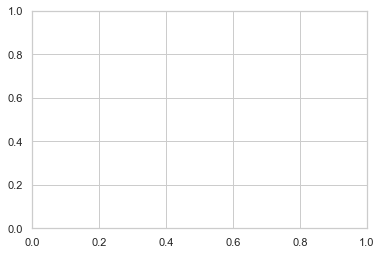

In [36]:
sns.set(style='whitegrid')
ax = sns.boxplot(x=df['question_code'])

## Dataset Modeling & Analysis 

## Conclusion

## Awknowledgements

Ms. Sconyers
- Giving me codes and notes to use
- Make a google doc or discussion group to post codes to share and use
- Explaining the project
- Helping me with groupby, unique and finding how many responses for the questions and how many questions there are

